## Stage 3 – Modeling Random Forest Classifier

#### Langkah 3.1 – Split Train-Test Data

In [2]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load data asli
df = pd.read_csv('../data/restaurant_profitability.csv', sep = ';')  # sesuaikan path

# Encode target
le_target = LabelEncoder()
df['Profitability'] = le_target.fit_transform(df['Profitability'])

# Simpan encoder target
joblib.dump(le_target, '../model/le_target.pkl')

# Pisahkan X dan y
X = df.drop(columns='Profitability')
y = df['Profitability']

# Encode fitur kategorik
le_restaurant = LabelEncoder()
le_menucategory = LabelEncoder()
le_menuitem = LabelEncoder()
le_ingredients = LabelEncoder()

X['RestaurantID'] = le_restaurant.fit_transform(X['RestaurantID'])
X['MenuCategory'] = le_menucategory.fit_transform(X['MenuCategory'])
X['MenuItem'] = le_menuitem.fit_transform(X['MenuItem'])
X['Ingredients'] = le_ingredients.fit_transform(X['Ingredients'])

# Gabungkan semua kembali ke satu DataFrame
df_model = X.copy()
df_model['Profitability'] = y

In [3]:
from sklearn.model_selection import train_test_split

# Gunakan df_model dari Stage 2 (fitur numerik)
X = df_model.drop(columns='Profitability')
y = df_model['Profitability']

# Stratify supaya distribusi kelas seimbang di train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### Langkah 3.2 – Train Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Model dasar
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # karena datamu agak imbalance
    n_estimators=100
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Langkah 3.3 – Evaluasi Model

Akurasi: 0.905
              precision    recall  f1-score   support

         Low       0.89      0.94      0.91        77
      Medium       0.80      0.67      0.73        24
        High       0.94      0.94      0.94        99

    accuracy                           0.91       200
   macro avg       0.88      0.85      0.86       200
weighted avg       0.90      0.91      0.90       200



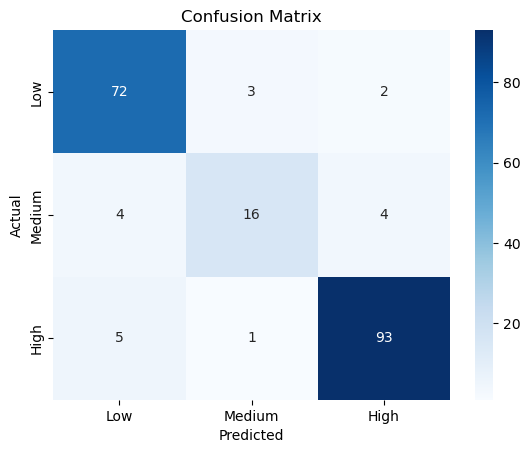

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)

# Evaluasi akurasi & klasifikasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####  Langkah 3.4 – Simpan Model untuk Deploy

In [8]:
import joblib
import os

os.makedirs('../model', exist_ok=True)
joblib.dump(rf, '../model/best_model.pkl')

['../model/best_model.pkl']